In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [23]:
# Load CSV file and convert into a df
Datacrypto_df = pd.read_csv('crypto_data.csv')
Datacrypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [24]:
###---------------------------------Prepare The Data---------------------------------###

In [25]:
# Find the EDA
Datacrypto_df.shape

(1252, 7)

In [26]:
#get the crypto count value
Datacrypto_df.value_counts()

Unnamed: 0  CoinName     Algorithm    IsTrading  ProofType  TotalCoinsMined  TotalCoinSupply
1337        EliteCoin    X13          True       PoW/PoS    2.927942e+10     314159265359       1
POKER       PokerCoin    Scrypt       False      PoS/PoW    0.000000e+00     466666667          1
PKB         ParkByte     SHA-256      True       PoW/PoS    0.000000e+00     25000000           1
PLNC        PLNCoin      Scrypt       True       PoW/PoS    1.708960e+07     38540000           1
PLTC        PlatinCoin   CryptoNight  True       PoW        8.430000e+04     600000518          1
                                                                                               ..
FAIR        FairCoin     Groestl      True       PoW/PoS    5.319383e+07     0                  1
FC2         Fuel2Coin    X11          True       PoS        0.000000e+00     100000000          1
FCN         FantomCoin   CryptoNight  True       PoW        0.000000e+00     18400000           1
FIBRE       FIBRE        

In [27]:
# Filter out the currencies that are still being traded
Datacrypto_df = Datacrypto_df[Datacrypto_df['IsTrading'] == True]
Datacrypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [28]:
# Drop/eliminate the IsTrading column
Datacrypto_df = Datacrypto_df.drop(columns ='IsTrading')

In [29]:
# Check null values
Datacrypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [30]:
# Remove rows with null values
Datacrypto_df = Datacrypto_df.dropna()

In [31]:
# Verify nulls are dropped
Datacrypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [32]:
# Filter for cryptocurrencies that have been mined
Datacrypto_df = Datacrypto_df[Datacrypto_df["TotalCoinsMined"]> 0]
Datacrypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [33]:
# Save and add CoinName column for t-SNE
Coin_name=pd.DataFrame(Datacrypto_df['CoinName']).reset_index(drop=True)
Coin_name

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [34]:
# Since the coin names column does not contribute to the analysis thus, delete the dataframe
Datacrypto_df.drop(columns='CoinName', axis=1, inplace= True)
Datacrypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [35]:
# Drop Unamed:0 columns from the data
Datacrypto_df = Datacrypto_df.drop(columns=['Unnamed: 0'])
Datacrypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [36]:
# convert the Algorithm and ProofType into a numerical data
X = pd.get_dummies(Datacrypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# View column names in X
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [44]:
# Standarize dataset
scaler = StandardScaler()
Crypto_scaled = scaler.fit_transform(X)

In [45]:
# What are count features in column dataset
len(X.columns)

98

In [46]:
###----------------------------------Dimensional Reduction-------------------------------####
###--------------------------------------PCA---------------------------------------------###

In [47]:
#PCA

In [49]:
## Applying PCA to reduce dimensions from 98 to 4
# Start model 
pca = PCA(n_components=4)

# Get three principal components for the crypto data.
Datacrypto_pca1 = pca.fit_transform(Crypto_scaled)

In [50]:
# Transform PCA data into DataFrame
crypto_pca1_df = pd.DataFrame(data= Datacrypto_pca1, 
                             columns=["PC 1", "PC 2", "PC 3", "PC4"])
crypto_pca1_df.head()

,PC 1,PC 2,PC 3,PC4
0,-0.334666,1.036087,-0.611474,-0.008430
1,-0.318002,1.036216,-0.611754,-0.008318
2,2.303416,1.618936,-0.572369,-0.046840
3,-0.144728,-1.333157,0.220698,-0.000390
4,-0.146430,-2.063371,0.429715,-0.010201


In [51]:
# Preserve 90% of the explained variance in dimensionality reduction using PCA
pca2 = PCA(n_components=.90)

# find the three principal components for the crypto data.
Datacrypto_pca = pca2.fit_transform(crypto_scaled)
Datacrypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         9.57234205e-16, -2.11469414e-15,  8.76221761e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         2.28533713e-15, -1.73100279e-15,  8.82823293e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -3.51037842e-14,  1.06482358e-13, -6.60916271e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         9.98793284e-15,  5.10697505e-14, -1.02007349e-13],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.90049046e-15, -2.42369869e-15,  9.92265708e-17],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         6.51071425e-16, -1.57133933e-15,  3.65596727e-15]])

In [53]:
# Transform PCA data to a DataFrame
tf_crypto_pca = pd.DataFrame(data=Datacrypto_pca)
tf_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.984956e-12,-5.587163e-15,-4.070858e-16,-0.007129,-1.319756,-0.051813,...,-2.470702e-15,1.891693e-15,-5.539121e-15,-1.279294e-15,-1.078497e-15,-3.351254e-15,3.226812e-15,9.572342e-16,-2.114694e-15,8.762218e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.960484e-12,-5.826890e-15,-4.050436e-16,-0.007739,-1.322514,-0.056674,...,-2.751444e-15,1.650072e-15,-5.142541e-15,-7.870911e-16,-6.950084e-16,-3.692322e-15,3.801505e-15,2.285337e-15,-1.731003e-15,8.828233e-16
2,2.305468,1.656383,-0.683617,0.004731,1.016664e-11,-5.720923e-15,7.053242e-15,-0.054781,-1.542879,-0.943951,...,1.836982e-14,-1.610794e-14,4.401464e-14,9.704872e-15,-2.412961e-14,7.415236e-14,-7.963189e-14,-3.510378e-14,1.064824e-13,-6.609163e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.640153e-12,2.427808e-15,-1.548256e-15,-0.002071,0.281463,0.251862,...,2.149155e-15,4.212773e-15,-2.388025e-17,-6.512118e-15,-3.653415e-15,6.466600e-15,-9.028861e-15,4.033250e-15,1.681151e-14,-9.086748e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.658854e-12,-8.999548e-16,-1.106936e-15,0.027735,0.519099,0.188820,...,8.462173e-14,1.200669e-14,-4.413189e-14,1.435070e-14,1.071627e-14,-3.707038e-14,-3.236237e-14,-4.319863e-14,1.135017e-13,-1.393439e-13


([<matplotlib.axis.XTick at 0x1aac466b3a0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

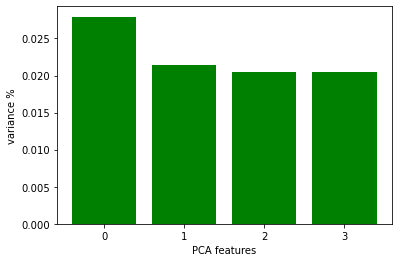

In [54]:
# Plot and explaination of the variance
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
#Explanation => Looking at this we have about 74 principal components and 90% of information from the dataset

In [56]:
# Number of features are
len(tf_crypto_pca.columns)

74

In [27]:
# Looking at this we have about 74 principal components and 90% of information from the dataset

In [28]:
#####-------------------Further reduce the dataset dimensions with t-SNE---------------------#####

In [59]:
# start t-SNE model
tsne = TSNE(learning_rate=35)

In [61]:
# Reduce dimensionsa and check that dimensions have been reduced to two
tsne_features = tsne.fit_transform(tf_crypto_pca)
tsne_features.shape

(532, 2)

In [62]:
#--Using t-SNE reduces the features to 2

In [63]:
# The first column x of transformed features
x = tsne_features[:,0]

# The second column y of transformed features
y = tsne_features[:,1]

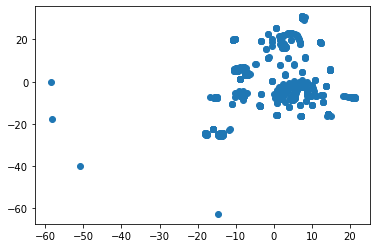

In [64]:
# Plot the results
plt.scatter(x, y)
plt.show()

In [65]:
### Cluster Analysis with k-Means

C:\Users\Victor M Diaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


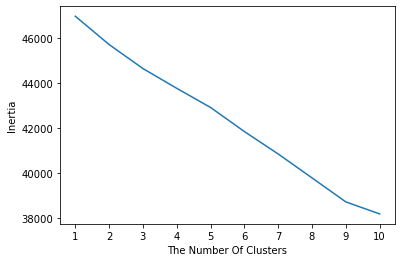

In [67]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tf_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('The Number Of Clusters')
plt.ylabel('Inertia')
plt.show()

In [68]:
df_elbow.head(10) 

,k,inertia
0,1,46979.075160
1,2,45721.709631
2,3,44654.936209
3,4,43776.296588
4,5,42924.921937
5,6,41855.539081
6,7,40858.473110
7,8,39795.341753
8,9,38728.623195
9,10,38195.332041


In [ ]:
#There is no clear elbow in the graph and k-means beyond which the inertia doesn't change much at all. 
# A deeper dive in a select a number of clusters based on business needs, 
#or approach it different and perhaps investigate using silhouette score to find the best number of clusters based on the data.